# Figure 8: 

Evolution of spatially averaged and mass-weighted vertical average of diabatic PV tendencies between (a) 8-12 km, (b) 4-8 km, (c) 2-4 km, and (d) 0-2 km in the CRH simulation. Panels (e-h) show the differences between the CRH and REF simulations (CRH-REF). Note the different y-axes in the panels. Total diabatic PV tendency (black line) is the sum of the individual diabatic PV tendencies shown as colored lines.

-----------------------

@ Behrooz Keshtgar, KIT 2022

## 1- load python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import warnings
warnings.filterwarnings("ignore")
import colorlegend

For reference, print package versions to screen:

In [2]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.19.1
matplotlib: 3.3.0


## 2- Loading datasets

In [3]:
# Dictionary for loading simulations
simdict = {
         'LC1-channel-4000x9000km-2km-0002' : {'res':'2.5km', 'radiation':0, 'rh':0.8, 'mphy':1}, # No radiation 
         'LC1-channel-4000x9000km-2km-0003' : {'res':'2.5km', 'radiation':1, 'rh':0.8, 'mphy':1}, # Cloud radiation 
         }

In [4]:
def load_simulations():
    ds_list = []
    for sim in list(simdict.keys()): 
        print('Working on loading data for', sim)
        path = '/work/bb1135/from_Mistral/bb1135/b381185/output/LC1_Limited_channel/icon-v.2.6.2.2_2km/sim_list_output/'+sim+'_remapped_0.5x0.5/'
        # datasets
        fname1 = path+"icon-fg*.nc"
        fname2 = path+"pv_tendencies.nc"
        ds_var1 = xr.open_mfdataset(fname1)[['pres']]
        ds_var2 = xr.open_mfdataset(fname2)
        ds_merge = xr.merge([ds_var1, ds_var2])
        ds_list.append(ds_merge)
        del ds_var1,ds_var2
    return ds_list
#----------------------------------
ds_list = load_simulations()
#---------------------------------- REF simulation
# excluding boundaries
ds_list[0] = ds_list[0].sel(lat=slice(10,80))
ds_list[1] = ds_list[1].sel(lat=slice(10,80))
# deriving pressure thickness
tmp0 = ds_list[0].pres.values
dp0 = np.zeros(tmp0.shape) * np.nan
dp0[:,1:-1,...] = (tmp0[:,2:,...] - tmp0[:,:-2,...]) 
dp0[:,0,...] = (tmp0[:,1,...] - tmp0[:,0,...]) 
dp0[:,-1,...] = (tmp0[:,-1,...] - tmp0[:,-2,...]) 
#----------------------------------- CRH simulation
tmp1 = ds_list[1].pres.values
dp1 = np.zeros(tmp1.shape) * np.nan
dp1[:,1:-1,...] = (tmp1[:,2:,...] - tmp1[:,:-2,...]) 
dp1[:,0,...] = (tmp1[:,1,...] - tmp1[:,0,...]) 
dp1[:,-1,...] = (tmp1[:,-1,...] - tmp1[:,-2,...])
#-------------
dp00 = dp0.mean(axis=(2,3))
dp11 = dp1.mean(axis=(2,3))

Working on loading data for LC1-channel-4000x9000km-2km-0002
Working on loading data for LC1-channel-4000x9000km-2km-0003


## 3- Spatial average and mass-weighted vertical mean of diabatic PV tendencies and their differences to the REF simulation

In [5]:
# PV tendencies based on 3D components
# spatial average
def spin_ts(var):
    si = var.mean(axis=(2,3))
    return(si)

for i in range(len(ds_list)):
    if i == 1:
        for var in ['ddt_pv_mphy','ddt_pv_radlw','ddt_pv_turb','ddt_pv_radsw','ddt_pv_pconv','ddt_pv_fric']:
            # 8-12 km
            ds_list[i][var+'_sp_upp']=(((spin_ts(ds_list[i][var].isel(height=slice(25,36)))*dp11[:,25:36]).sum('height')/dp11[:,25:36].sum(axis=1))*1e6).compute()
            # 4-8 km
            ds_list[i][var+'_sp_mid']=(((spin_ts(ds_list[i][var].isel(height=slice(35,49)))*dp11[:,35:49]).sum('height')/dp11[:,35:49].sum(axis=1))*1e6).compute()
            # 2-4 km
            ds_list[i][var+'_sp_low']=(((spin_ts(ds_list[i][var].isel(height=slice(48,58)))*dp11[:,48:58]).sum('height')/dp11[:,48:58].sum(axis=1))*1e6).compute()
            # 0-2 km
            ds_list[i][var+'_sp_bnd']=(((spin_ts(ds_list[i][var].isel(height=slice(57,75)))*dp11[:,57:75]).sum('height')/dp11[:,57:75].sum(axis=1))*1e6).compute()
        # total      
        ds_list[i]['ddt_pv_totphy_sp_upp'] =  ds_list[i]['ddt_pv_mphy_sp_upp'] + ds_list[i]['ddt_pv_radlw_sp_upp'] + ds_list[i]['ddt_pv_radsw_sp_upp'] + ds_list[i]['ddt_pv_pconv_sp_upp'] + ds_list[i]['ddt_pv_turb_sp_upp'] + ds_list[i]['ddt_pv_fric_sp_upp'] 
        ds_list[i]['ddt_pv_totphy_sp_mid'] =  ds_list[i]['ddt_pv_mphy_sp_mid'] + ds_list[i]['ddt_pv_radlw_sp_mid'] + ds_list[i]['ddt_pv_radsw_sp_mid'] + ds_list[i]['ddt_pv_pconv_sp_mid'] + ds_list[i]['ddt_pv_turb_sp_mid'] + ds_list[i]['ddt_pv_fric_sp_mid']
        ds_list[i]['ddt_pv_totphy_sp_low'] =  ds_list[i]['ddt_pv_mphy_sp_low'] + ds_list[i]['ddt_pv_radlw_sp_low'] + ds_list[i]['ddt_pv_radsw_sp_low'] + ds_list[i]['ddt_pv_pconv_sp_low'] + ds_list[i]['ddt_pv_turb_sp_low'] + ds_list[i]['ddt_pv_fric_sp_low']
        ds_list[i]['ddt_pv_totphy_sp_bnd'] =  ds_list[i]['ddt_pv_mphy_sp_bnd'] + ds_list[i]['ddt_pv_radlw_sp_bnd'] + ds_list[i]['ddt_pv_radsw_sp_bnd'] + ds_list[i]['ddt_pv_pconv_sp_bnd'] + ds_list[i]['ddt_pv_turb_sp_bnd'] + ds_list[i]['ddt_pv_fric_sp_bnd']
    else:
        for var in ['ddt_pv_mphy','ddt_pv_turb','ddt_pv_pconv','ddt_pv_fric']:
            # 8-12 km
            ds_list[i][var+'_sp_upp']=(((spin_ts(ds_list[i][var].isel(height=slice(25,36)))*dp00[:,25:36]).sum('height')/dp00[:,25:36].sum(axis=1))*1e6).compute()
            # 4-8 km
            ds_list[i][var+'_sp_mid']=(((spin_ts(ds_list[i][var].isel(height=slice(35,49)))*dp00[:,35:49]).sum('height')/dp00[:,35:49].sum(axis=1))*1e6).compute()
            # 2-4 km
            ds_list[i][var+'_sp_low']=(((spin_ts(ds_list[i][var].isel(height=slice(48,58)))*dp00[:,48:58]).sum('height')/dp00[:,48:58].sum(axis=1))*1e6).compute()
            # 0-2 km
            ds_list[i][var+'_sp_bnd']=(((spin_ts(ds_list[i][var].isel(height=slice(57,75)))*dp00[:,57:75]).sum('height')/dp00[:,57:75].sum(axis=1))*1e6).compute()
        # total      
        ds_list[i]['ddt_pv_totphy_sp_upp'] =  ds_list[i]['ddt_pv_mphy_sp_upp'] + ds_list[i]['ddt_pv_pconv_sp_upp'] + ds_list[i]['ddt_pv_turb_sp_upp'] + ds_list[i]['ddt_pv_fric_sp_upp'] 
        ds_list[i]['ddt_pv_totphy_sp_mid'] =  ds_list[i]['ddt_pv_mphy_sp_mid'] + ds_list[i]['ddt_pv_pconv_sp_mid'] + ds_list[i]['ddt_pv_turb_sp_mid'] + ds_list[i]['ddt_pv_fric_sp_mid']
        ds_list[i]['ddt_pv_totphy_sp_low'] =  ds_list[i]['ddt_pv_mphy_sp_low'] + ds_list[i]['ddt_pv_pconv_sp_low'] + ds_list[i]['ddt_pv_turb_sp_low'] + ds_list[i]['ddt_pv_fric_sp_low']
        ds_list[i]['ddt_pv_totphy_sp_bnd'] =  ds_list[i]['ddt_pv_mphy_sp_bnd'] + ds_list[i]['ddt_pv_pconv_sp_bnd'] + ds_list[i]['ddt_pv_turb_sp_bnd'] + ds_list[i]['ddt_pv_fric_sp_bnd']

In [6]:
# differences
# CRH - REF
for var in ['ddt_pv_totphy','ddt_pv_mphy','ddt_pv_turb','ddt_pv_pconv','ddt_pv_fric']:
    ds_list[0][var+'_diff_upp'] = ds_list[1][var+'_sp_upp'] - ds_list[0][var+'_sp_upp']
    ds_list[0][var+'_diff_mid'] = ds_list[1][var+'_sp_mid'] - ds_list[0][var+'_sp_mid']
    ds_list[0][var+'_diff_low'] = ds_list[1][var+'_sp_low'] - ds_list[0][var+'_sp_low']
    ds_list[0][var+'_diff_bnd'] = ds_list[1][var+'_sp_bnd'] - ds_list[0][var+'_sp_bnd']
    
# from day 2 to day 9
ds_list[0] = ds_list[0].isel(time=slice(48,216))
ds_list[1] = ds_list[1].isel(time=slice(48,216))

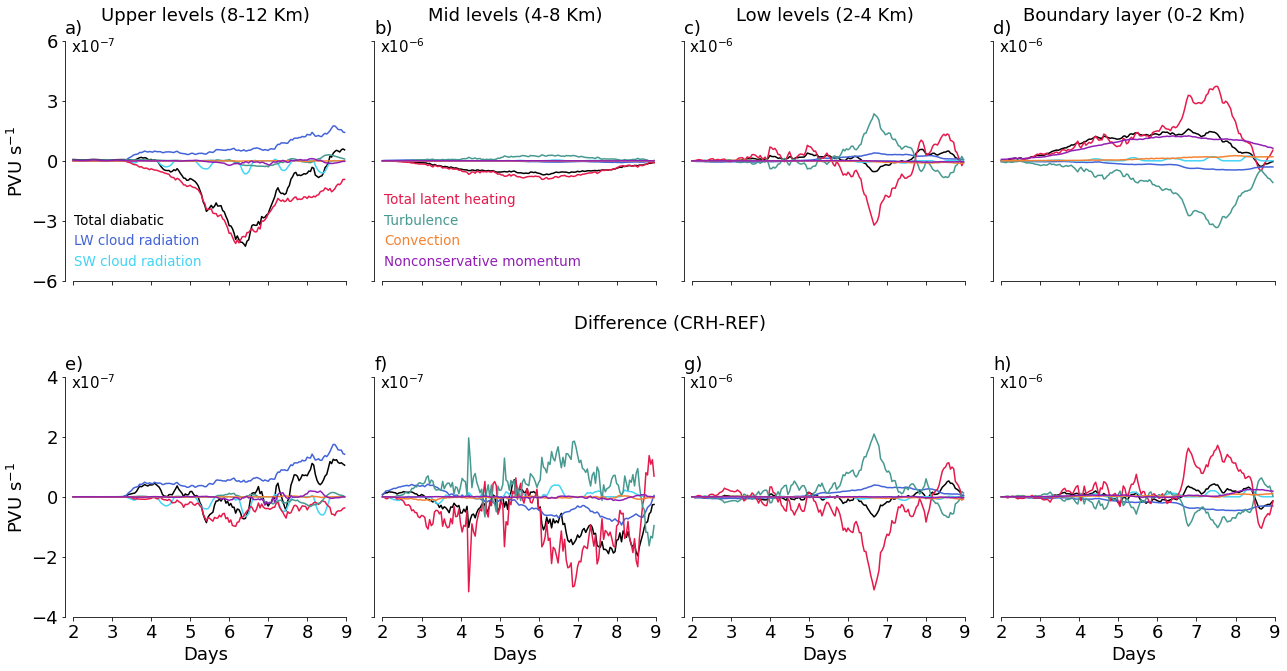

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 10))

i = 0

for ax in axes.flat:
    
    ax.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
    ax.tick_params(labelsize=18)
    
    ax.spines['bottom'].set_bounds(0,168)
    ax.set_xticks(np.arange(0,169,24))
    ax.set_xticklabels(["2","3","4","5","6","7","8","9"])
    ax.set_xlim([-5, 168])
    
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    
    if i == 0:

        ax.plot(ds_list[1]['ddt_pv_totphy_sp_upp']*1e7,'#000000',label="Total diabatic",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radlw_sp_upp']*1e7,'#4363d8',label="LW cloud radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radsw_sp_upp']*1e7,'#42d4f4',label="SW cloud radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_mphy_sp_upp']*1e7,'#e6194B',linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_turb_sp_upp']*1e7,'#469990',linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_pconv_sp_upp']*1e7,'#f58231',linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_fric_sp_upp']*1e7,'#911eb4',linewidth=1.5)
        lg=colorlegend.color_legend(ax,loc=3,fsize=13.5)
        ax.set_title('Upper levels (8-12 Km)',fontsize=18,pad=20)
        ax.text(0.0, 1.03, 'a)', transform=ax.transAxes, 
            size=18 )
        ax.text(0.02, 0.95, 'x10$^{-7}$', transform=ax.transAxes, 
            size=15 )
        ax.set_ylabel('PVU s$^{-1}$',fontsize=18)
        ax.set_xticklabels([])
        ax.spines['left'].set_bounds(-6,6)
        ax.set_yticks(np.arange(-6,9,3))
        ax.set_ylim([-6,6])
        
    if i == 1:

        ax.plot(ds_list[1]['ddt_pv_totphy_sp_mid']*1e6,'#000000',linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radlw_sp_mid']*1e6,'#4363d8',linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radsw_sp_mid']*1e6,'#42d4f4',linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_mphy_sp_mid']*1e6,'#e6194B',label="Total latent heating",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_turb_sp_mid']*1e6,'#469990',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_pconv_sp_mid']*1e6,'#f58231',label="Convection",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_fric_sp_mid']*1e6,'#911eb4',label="Nonconservative momentum",linewidth=1.5)
        ax.set_title('Mid levels (4-8 Km)',fontsize=18,pad=20)
        lg=colorlegend.color_legend(ax,loc=3,fsize=13.5)
        ax.text(0.02, 0.95, 'x10$^{-6}$', transform=ax.transAxes, 
            size=15 )
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.spines['left'].set_bounds(-6,6)
        ax.set_yticks(np.arange(-6,9,3))
        ax.set_ylim([-6,6])
        ax.text(0.0, 1.03, 'b)', transform=ax.transAxes, 
            size=18 )
        
    if i == 2:

        ax.plot(ds_list[1]['ddt_pv_totphy_sp_low']*1e6,'#000000',label="Total diabatic",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radlw_sp_low']*1e6,'#4363d8',label="LW cloud radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radsw_sp_low']*1e6,'#42d4f4',label="SW cloud radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_mphy_sp_low']*1e6,'#e6194B',label="Total latent heating",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_turb_sp_low']*1e6,'#469990',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_pconv_sp_low']*1e6,'#f58231',label="Convection",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_fric_sp_low']*1e6,'#911eb4',label="Diabatic winds",linewidth=1.5)
        #lg=colorlegend.color_legend(ax,loc=3,fsize=10.5)
        ax.set_title('Low levels (2-4 Km)',fontsize=18,pad=20) 
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.text(0.02, 0.95, 'x10$^{-6}$', transform=ax.transAxes, 
            size=15 )
        ax.spines['left'].set_bounds(-6,6)
        ax.set_yticks(np.arange(-6,9,3))
        ax.set_ylim([-6,6])
        ax.text(0.0, 1.03, 'c)', transform=ax.transAxes, 
            size=18 )
        
    if i == 3:
        
        ax.plot(ds_list[1]['ddt_pv_totphy_sp_bnd']*1e6,'#000000',label="Total",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_mphy_sp_bnd']*1e6,'#e6194B',label="Microphysics",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radlw_sp_bnd']*1e6,'#4363d8',label="Cloud_lw_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radsw_sp_bnd']*1e6,'#42d4f4',label="Cloud_sw_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_turb_sp_bnd']*1e6,'#469990',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_pconv_sp_bnd']*1e6,'#f58231',label="Convection",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_fric_sp_bnd']*1e6,'#911eb4',label="Diabatic winds",linewidth=1.5)
       
        ax.set_title('Boundary layer (0-2 Km)',fontsize=18,pad=20) 
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.text(0.02, 0.95, 'x10$^{-6}$', transform=ax.transAxes, 
            size=15 )
        ax.spines['left'].set_bounds(-6,6)
        ax.set_yticks(np.arange(-6,9,3))
        ax.set_ylim([-6,6])
        ax.text(0.0, 1.03, 'd)', transform=ax.transAxes, 
            size=18 )    
        
        
    if i == 4:
        
        ax.plot(ds_list[0]['ddt_pv_totphy_diff_upp']*1e7,'#000000',label="Total",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radlw_sp_upp']*1e7,'#4363d8',label="Cloud_LW_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radsw_sp_upp']*1e7,'#42d4f4',label="Cloud_SW_radiation",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_mphy_diff_upp']*1e7,'#e6194B',label="Microphysics",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_turb_diff_upp']*1e7,'#469990',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_pconv_diff_upp']*1e7,'#f58231',label="Convection",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_fric_diff_upp']*1e7,'#911eb4',label="Diabatic winds",linewidth=1.5)
        
        ax.text(0.0, 1.03, 'e)', transform=ax.transAxes, 
            size=18 )
        ax.set_ylabel('PVU s$^{-1}$',fontsize=18)
        ax.set_xlabel('Days',fontsize=18)
        ax.text(0.02, 0.95, 'x10$^{-7}$', transform=ax.transAxes, 
            size=15 )
        ax.set_xlabel('Days',fontsize=18)
        ax.spines['left'].set_bounds(-4,4)
        ax.set_yticks(np.arange(-4,6,2))
        ax.set_ylim([-4,4])

    if i == 5:
        
        ax.plot(ds_list[0]['ddt_pv_totphy_diff_mid']*1e7,'#000000',label="Total",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radlw_sp_mid']*1e7,'#4363d8',label="Cloud_LW_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radsw_sp_mid']*1e7,'#42d4f4',label="Cloud_SW_radiation",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_mphy_diff_mid']*1e7,'#e6194B',label="Microphysics",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_turb_diff_mid']*1e7,'#469990',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_pconv_diff_mid']*1e7,'#f58231',label="Convection",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_fric_diff_mid']*1e7,'#911eb4',label="Diabatic winds",linewidth=1.5)
        
        ax.text(0.0, 1.03, 'f)', transform=ax.transAxes, 
            size=18 )
        ax.text(0.02, 0.95, 'x10$^{-7}$', transform=ax.transAxes, 
            size=15 )
        ax.set_yticklabels([])
        ax.set_xlabel('Days',fontsize=18)
        ax.set_xlabel('Days',fontsize=18)
        ax.spines['left'].set_bounds(-4,4)
        ax.set_yticks(np.arange(-4,6,2))
        ax.set_ylim([-4,4])
   
    if i == 6:
        
        ax.plot(ds_list[0]['ddt_pv_totphy_diff_low']*1e6,'#000000',label="Total",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radlw_sp_low']*1e6,'#4363d8',label="Cloud_LW_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radsw_sp_low']*1e6,'#42d4f4',label="Cloud_SW_radiation",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_mphy_diff_low']*1e6,'#e6194B',label="Microphysics",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_turb_diff_low']*1e6,'#469990',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_pconv_diff_low']*1e6,'#f58231',label="Convection",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_fric_diff_low']*1e6,'#911eb4',label="Diabatic winds",linewidth=1.5)
        
        ax.text(0.0, 1.03, 'g)', transform=ax.transAxes, 
            size=18 )
        ax.text(0.02, 0.95, 'x10$^{-6}$', transform=ax.transAxes, 
            size=15 )
        ax.set_yticklabels([])
        ax.set_xlabel('Days',fontsize=18)
        ax.set_xlabel('Days',fontsize=18)
        ax.spines['left'].set_bounds(-4,4)
        ax.set_yticks(np.arange(-4,6,2))
        ax.set_ylim([-4,4])
        
    if i == 7:
        
        ax.plot(ds_list[0]['ddt_pv_totphy_diff_bnd']*1e6,'#000000',label="Total",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radlw_sp_bnd']*1e6,'#4363d8',label="Cloud_LW_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_radsw_sp_bnd']*1e6,'#42d4f4',label="Cloud_SW_radiation",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_mphy_diff_bnd']*1e6,'#e6194B',label="Microphysics",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_turb_diff_bnd']*1e6,'#469990',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_pconv_diff_bnd']*1e6,'#f58231',label="Convection",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_fric_diff_bnd']*1e6,'#911eb4',label="Diabatic winds",linewidth=1.5)
        
        ax.text(0.02, 0.95, 'x10$^{-6}$', transform=ax.transAxes, 
            size=15 )
        ax.text(0.0, 1.03, 'h)', transform=ax.transAxes, 
            size=18 )
        ax.set_yticklabels([])
        ax.set_xlabel('Days',fontsize=18)
        ax.spines['left'].set_bounds(-4,4)
        ax.set_yticks(np.arange(-4,6,2))
        ax.set_ylim([-4,4])
        
    i = i + 1
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.1, hspace=0.4)   

plt.text(.45, 0.5, 'Difference (CRH-REF)', transform=fig.transFigure, horizontalalignment='center',fontsize=18)

plt.savefig('figure8.pdf', bbox_inches = 'tight')
#plt.savefig('figure8.png', bbox_inches = 'tight',dpi=300)